### INTRODUCTION


What is Data Analysis?

Data Analysisis understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning. Plotting in DA consists of Histograms, Box plot, Scatter plot and many more. It often takes much time to explore the data. Through the process of DA, we can ask to define the problem statement or definition on our data set which is very important.

I got a very beautiful data-set of cars from Kaggle. To give a piece of brief information about the data set this data contains more of 10, 000 rows and more than 10 columns which contains features of the car such as Engine Fuel Type, Engine Size, HP, Transmission Type, highway MPG, city MPG and many more.

# 1.Importing Required Libraries

In [1]:


import pandas as pd
import numpy as np
import seaborn as sns # Data Visualisation
import matplotlib.pyplot as plt # Data Visualisation
%matplotlib inline
sns.set(color_codes=True)

## 2.LOADING DATA INTO FRAME !

In [2]:
df = pd.read_csv("data[1].csv")
df.head(5) #to display top 5 rows

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
def hist(df):
    df.hist(figsize=(10,10))

In [4]:
def val_counts(df):
    df.Make.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5),color="purple")
    plt.title("Number of Cars by Make")
    plt.ylabel("Number of Cars")
    plt.xlabel("Make")

In [5]:
def stack(df):    
    df.head(10).plot(kind='bar',stacked=True)

In [6]:
def top_ten(df):
    top_ten = df.groupby("Make").size().sort_values(ascending=False).head(10)
    top_ten_df = pd.DataFrame(top_ten.reset_index(name="Count"))
    plt.title('Top 10 car makers')
    plt.ylabel('Number of cars')
    plt.xticks(rotation=90)
    sns.barplot(x='Make', y='Count', data=top_ten_df)

In [7]:
def year_plot(df):
    plt.figure(figsize=(10,5))
    cars_prod_df = pd.DataFrame(
        df.groupby("Year")
        .size()
        .reset_index(name="Count")
    )
    plt.title('Cars production over the years')
    plt.xticks(rotation=90)
    sns.barplot(x="Year", y="Count", data=cars_prod_df);

In [8]:
def fuel_types(df):
    plt.figure(figsize=(10,5))
    fueldf = df[(df['Year'] > 2007) & (df['Year'] < 2017)].copy()
    ax = sns.countplot(x="Year", hue="Fuel", data=fueldf)
    plt.show()

In [9]:
def line_plots(df):
    df[["Popularity","Price"]].plot(kind='bar')#area plot=line plot

    df.plot(kind="kde")#kernel density plot
    
    df[['Year','Fuel']].plot(kind="kde")
    
    df[['Popularity','Year']].plot(kind="kde")
    
    sns.lineplot(df['HP'],df['Price'],df['Popularity'])

In [10]:
def scatter_plots(df):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.scatter(df['HP'], df['Price'])
    ax.set_xlabel('HP')
    ax.set_ylabel('Price')
    plt.show()

    sns.relplot(data=df,x="HP",y="Price",hue="Popularity")

In [11]:
def violin_cat(df):
    sns.violinplot(data=df)
    sns.violinplot(data=df,x="Popularity",y="Vehicle Style")
    
    sns.catplot(data=df,
            x="Vehicle Style",
            y="Year",
            kind="strip",
           aspect = 4)

In [12]:
def heat_maps(df):
    plt.figure(figsize=(15,5))
    c = df.corr()
    sns.heatmap(c,cmap="YlGnBu_r",annot=True)
    display(c)

  

 


In [13]:
def diesel_car(df):
    plt.figure(figsize=(10,5))
    diesel_df = df[df['Fuel'].str.contains('diesel')].copy()
    ax = sns.countplot(x="Year", hue="Fuel", data=diesel_df)
    plt.show()

In [14]:
def suv_year(df):
    vs_df = df[df['Vehicle Style'].str.contains('SUV')].groupby(['Year', 'Vehicle Style']).size().reset_index(name="Count");
    df_pivot =  pd.pivot_table(
    vs_df, 
    values="Count",
    index="Year",
    columns="Vehicle Style",
    aggfunc=np.mean
    )

    df_pivot.plot(kind="bar", figsize=(20, 7))

In [15]:
def brand_car(df):
    popcars_df = df[['Make', 'Popularity']].sort_values('Popularity')
    popcars_df = popcars_df.drop_duplicates()
    popcars_df.plot(kind="bar", x="Make", figsize=(20,10),color="green");

In [16]:
def duplicates(df):
    duplicate_df = df[df.duplicated()]
    print("Number of Duplicate rows : ",duplicate_df.shape)
    display(df.count())
    df = df.drop_duplicates()
    
    return df

In [17]:
def missing(df):
    print('Number of null values in the dataset:\n', df.isnull().sum())
    df= df.dropna()
    display(df.count())
    return df

In [18]:
def outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)

    IQR = Q3 - Q1
    print(IQR)

In [19]:
def outlier_plots(df):
    outliers(df)
    print('\n', '*'*50)
    df.boxplot(showfliers=False)
    display(df.columns)
    
    fig, ax = plt.subplots(figsize=(12,12))
    sns.boxplot(x=df["Price"]).set_title('Price')
    
    sns.boxplot(x=df["HP"]).set_title('HP')

    sns.boxplot(x=df["Cylinders"]).set_title('Cylinders')
    
    sns.boxplot(x=df["Popularity"]).set_title('Popularity')

In [20]:
def data_preprop(df):
    display(df.dtypes)    
    df = df.drop(["Market Category","Number of Doors","Vehicle Size"],axis=1)
    df = df.rename(columns={"Engine HP":"HP","Engine Cylinders":"Cylinders","Transmission Type":"Transmission","Driven_Wheels":"Drive Mode","highway MPG":"MPG-H","city mpg":"MPG-C","MSRP":"Price","Engine Fuel Type":"Fuel"})
    
    print('\n', '*'*50)
    df = duplicates(df)
    
    print('\n', '*'*50)
    df = missing(df)

In [21]:
def data_read():
    df = pd.read_csv("data[1].csv")
    display(df.head(5))
    display(df.tail(5))
    data_preprop(df)

In [22]:
def plots(df):
    print('\n', '*'*50)
    outlier_plots(df)
    print('\n', '*'*50)
    hist(df)
    print('\n', '*'*50)
    val_counts(df)
    print('\n', '*'*50)
    stack(df)
    print('\n', '*'*50)
    top_ten(df)
    print('\n', '*'*50)
    year_plot(df)
    print('\n', '*'*50)
    fuel_types(df)
    print('\n', '*'*50)
    line_plots(df)
    print('\n', '*'*50)
    scatter_plots(df)
    print('\n', '*'*50)
    violin_cat(df)
    print('\n', '*'*50)
    heat_maps(df)
    print('\n', '*'*50)
    diesel_car(df)
    print('\n', '*'*50)
    suv_year(df)
    print('\n', '*'*50)
    brand_car(df)
    print('\n', '*'*50)
    

In [23]:
data_read()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


 **************************************************
Number of Duplicate rows :  (732, 13)


Make             11914
Model            11914
Year             11914
Fuel             11911
HP               11845
Cylinders        11884
Transmission     11914
Drive Mode       11914
Vehicle Style    11914
MPG-H            11914
MPG-C            11914
Popularity       11914
Price            11914
dtype: int64


 **************************************************
Number of null values in the dataset:
 Make              0
Model             0
Year              0
Fuel              3
HP               69
Cylinders        30
Transmission      0
Drive Mode        0
Vehicle Style     0
MPG-H             0
MPG-C             0
Popularity        0
Price             0
dtype: int64


Make             11081
Model            11081
Year             11081
Fuel             11081
HP               11081
Cylinders        11081
Transmission     11081
Drive Mode       11081
Vehicle Style    11081
MPG-H            11081
MPG-C            11081
Popularity       11081
Price            11081
dtype: int64

In [24]:
#To display bottom 5 rows
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


### 3.Checking the data -type !

In [25]:
def data_info(df):
    display(df.dtypes)

In [26]:
# checking data types
data_info(df)

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

### 4.Dropping unnecessary columns

In [27]:
def data_drop(df):
    df = df.drop(["Market Category","Number of Doors","Vehicle Size"],axis=1)
    display(df.head())

In [28]:
# Dropping unnecessary columns
data_drop(df)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Convertible,28,18,3916,34500


### 5.Renaming the columns

In [29]:
# Renaming the columns
df = df.rename(columns={"Engine HP":"HP","Engine Cylinders":"Cylinders","Transmission Type":"Transmission","Driven_Wheels":"Drive Mode","highway MPG":"MPG-H","city mpg":"MPG-C","MSRP":"Price","Engine Fuel Type":"Fuel"})
df.head()

,Make,Model,Year,Fuel,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [30]:

# checking duplicate entries

duplicate_df = df[df.duplicated()]
print("Number of Duplicate rows : ",duplicate_df.shape)

# use count the number of rows before removing the data
df.count()

Number of Duplicate rows :  (715, 16)


Make               11914
Model              11914
Year               11914
Fuel               11911
HP                 11845
Cylinders          11884
Transmission       11914
Drive Mode         11914
Number of Doors    11908
Market Category     8172
Vehicle Size       11914
Vehicle Style      11914
MPG-H              11914
MPG-C              11914
Popularity         11914
Price              11914
dtype: int64

In [31]:
# total number of rows and columns
df.shape

(11914, 16)

In [32]:
# Dropping the duplicates
df = df.drop_duplicates()
df.head()

,Make,Model,Year,Fuel,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Market Category,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [33]:
# counting the number of rows after removing dupicates
df.count()

Make               11199
Model              11199
Year               11199
Fuel               11196
HP                 11130
Cylinders          11169
Transmission       11199
Drive Mode         11199
Number of Doors    11193
Market Category     7823
Vehicle Size       11199
Vehicle Style      11199
MPG-H              11199
MPG-C              11199
Popularity         11199
Price              11199
dtype: int64

### 6.Dropping the missing or null values

In [34]:
#finding the null values

print(df.isnull().sum())

Make                  0
Model                 0
Year                  0
Fuel                  3
HP                   69
Cylinders            30
Transmission          0
Drive Mode            0
Number of Doors       6
Market Category    3376
Vehicle Size          0
Vehicle Style         0
MPG-H                 0
MPG-C                 0
Popularity            0
Price                 0
dtype: int64


In [35]:
# dropping the missing values

df= df.dropna()
df.count()

Make               7735
Model              7735
Year               7735
Fuel               7735
HP                 7735
Cylinders          7735
Transmission       7735
Drive Mode         7735
Number of Doors    7735
Market Category    7735
Vehicle Size       7735
Vehicle Style      7735
MPG-H              7735
MPG-C              7735
Popularity         7735
Price              7735
dtype: int64

In [36]:
# after dropping the null values
print(df.isnull().sum())

Make               0
Model              0
Year               0
Fuel               0
HP                 0
Cylinders          0
Transmission       0
Drive Mode         0
Number of Doors    0
Market Category    0
Vehicle Size       0
Vehicle Style      0
MPG-H              0
MPG-C              0
Popularity         0
Price              0
dtype: int64


### 7.Detecting Outliner 

<AxesSubplot:>

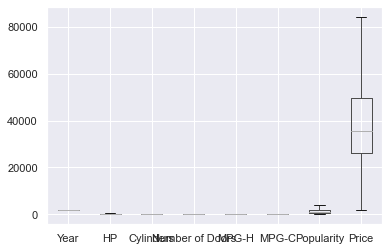

In [37]:
df.boxplot(showfliers=False)

<AxesSubplot:xlabel='Popularity'>

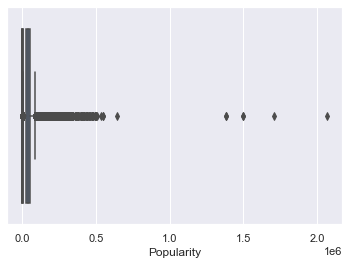

In [38]:
sns.boxplot(x=df["Price"])
sns.boxplot(x=df["HP"])
sns.boxplot(x=df["Cylinders"])
sns.boxplot(x=df["Popularity"])

<AxesSubplot:xlabel='HP'>

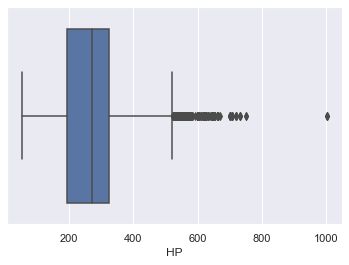

In [39]:
sns.boxplot(x=df["HP"])

<AxesSubplot:xlabel='Cylinders'>

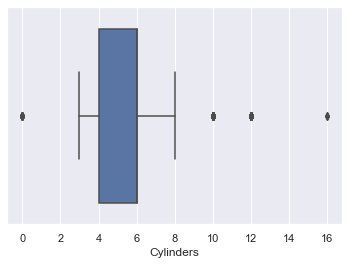

In [40]:
sns.boxplot(x=df["Cylinders"])

<AxesSubplot:xlabel='Popularity'>

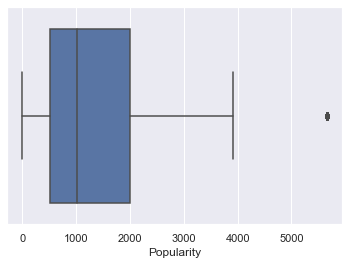

In [41]:

sns.boxplot(x=df["Popularity"])

In [42]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1
print(IQR)

Year                   6.0
HP                   131.0
Cylinders              2.0
Number of Doors        2.0
MPG-H                  8.0
MPG-C                  6.0
Popularity          1489.0
Price              23252.5
dtype: float64


In [43]:
df.shape

(7735, 16)

## 8.Data visualisation 

**Histogram**



Histogram refers to the frequency of occurrence of variables in an interval. In this case, there are mainly 10 different types of car manufacturing companies, but it is often important to know who has the most number of cars. To do this histogram is one of the trivial solutions which lets us know the total number of car manufactured by a different company.

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'HP'}>,
        <AxesSubplot:title={'center':'Cylinders'}>],
       [<AxesSubplot:title={'center':'Number of Doors'}>,
        <AxesSubplot:title={'center':'MPG-H'}>,
        <AxesSubplot:title={'center':'MPG-C'}>],
       [<AxesSubplot:title={'center':'Popularity'}>,
        <AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],
      dtype=object)

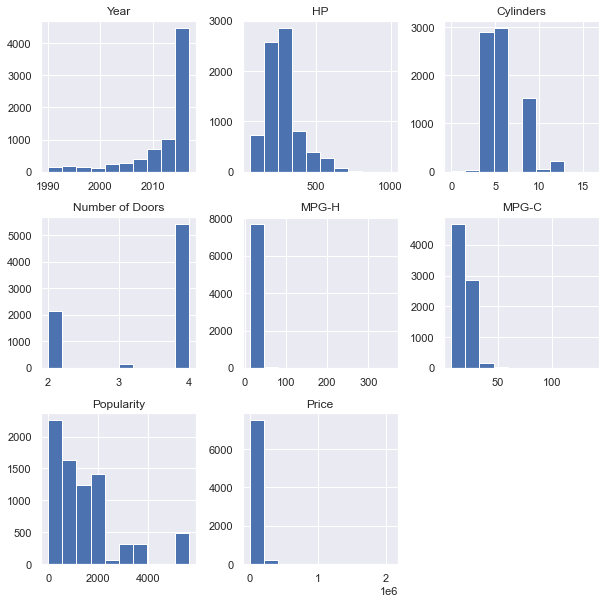

In [44]:
df.hist(figsize=(10,10))

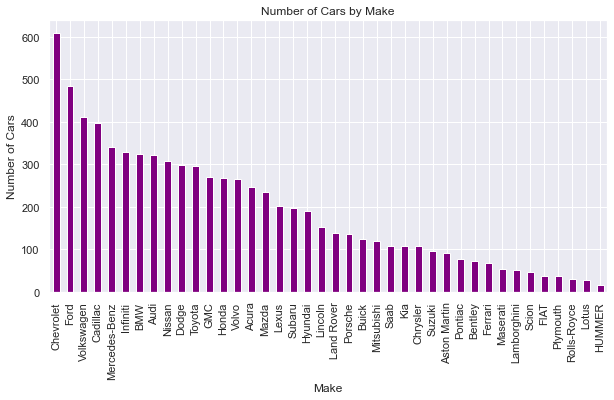

In [45]:
df.Make.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5),color="purple")
plt.title("Number of Cars by Make")
plt.ylabel("Number of Cars")
plt.xlabel("Make");

<AxesSubplot:>

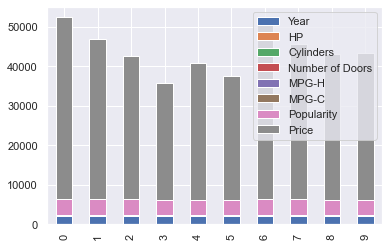

In [46]:
df.head(10).plot(kind='bar',stacked=True)

### TOP 10 CARS MANUFACTURE !

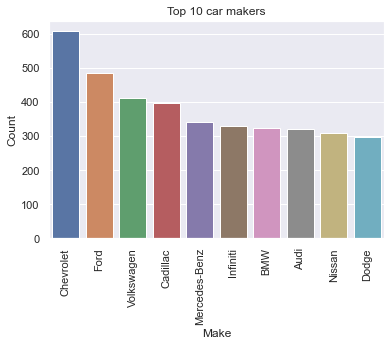

In [47]:
#plt.figure(figsize=(7,3))
top_ten = df.groupby("Make").size().sort_values(ascending=False).head(10)
top_ten_df = pd.DataFrame(top_ten.reset_index(name="Count"))
plt.title('Top 10 car makers')
plt.ylabel('Number of cars')
plt.xticks(rotation=90)
sns.barplot(x='Make', y='Count', data=top_ten_df);

**From the above bar plot we can infer that most of the people buy cars from Chevrolet, Ford, Toyota and Volkswagen as they produce more economical cars which can affored by more people.**

## Cars produced over the years

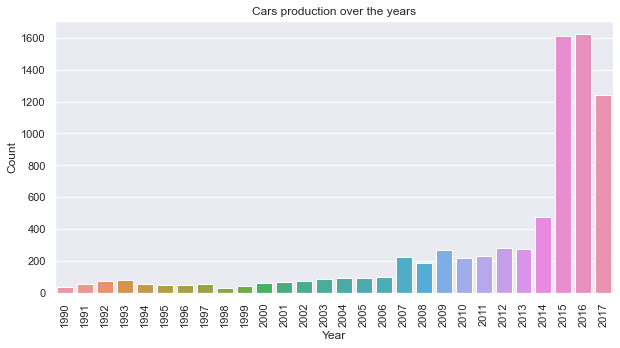

In [48]:

plt.figure(figsize=(10,5))
cars_prod_df = pd.DataFrame(
    df.groupby("Year")
    .size()
    .reset_index(name="Count")
)
plt.title('Cars production over the years')
plt.xticks(rotation=90)
sns.barplot(x="Year", y="Count", data=cars_prod_df);

**From the above chart we can see that cars production has increased over the years. In year 2017 though, we see a dip in the number of cars produced. It could also be because of incomplete data for 2017.**

## Fuel types per Year

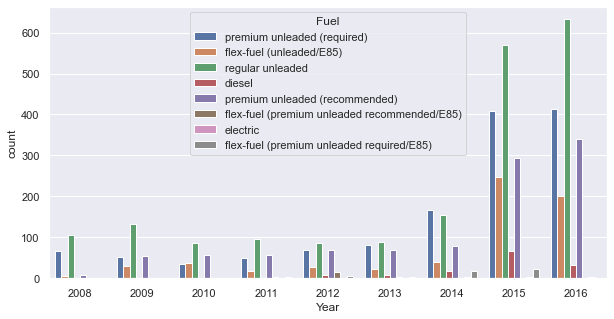

In [49]:
plt.figure(figsize=(10,5))
fueldf = df[(df['Year'] > 2007) & (df['Year'] < 2017)].copy()
ax = sns.countplot(x="Year", hue="Fuel", data=fueldf)
plt.show()

## Line Plot

**Line Plot show the relationship between x and y can be shown for different subsets of the data using the hue, size, and style parameters**

In [ ]:

df[["Popularity","Price"]].plot(kind='bar')#area plot=line plot

df.plot(kind="kde")#kernel density plot

<AxesSubplot:ylabel='Density'>

In [ ]:
df[['Year','Fuel']].plot(kind="kde")
df[['Popularity','Year']].plot(kind="kde")

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sns.lineplot(df['HP'],df['Price'],df['Popularity'])


## Scatterplot 


**We generally use scatter plots to find the correlation between two variables. Here the scatter plots are plotted between Horsepower and Price and we can see the plot below.**

In [ ]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()


In [ ]:
sns.relplot(data=df,x="HP",y="Price",hue="Popularity")


### Violin-Plot

In [ ]:
sns.violinplot(data=df)


In [ ]:
sns.violinplot(data=df,x="Popularity",y="Vehicle Style")

In [ ]:
sns.catplot(data=df,
            x="Vehicle Style",
            y="Year",
            kind="strip",
           aspect = 4)

## Heatmaps

**Heat Maps is a type of plot which is necessary when we need to find the dependent variables. One of the best way to find the relationship between the features can be done using heat maps. In the below heat map we know that the price feature depends mainly on the Engine Size, Horsepower, and Cylinders.**

In [ ]:
# find relation betweeb the variables
plt.figure(figsize=(15,5))
c = df.corr()
sns.heatmap(c,cmap="YlGnBu_r",annot=True)
c


 ## LET'S CHECK !!

 ### Has use of diesel cars increased or decresed over the years?

In [ ]:
plt.figure(figsize=(10,5))
diesel_df = df[df['Fuel'].str.contains('diesel')].copy()
ax = sns.countplot(x="Year", hue="Fuel", data=diesel_df)
plt.show()


**Use of diesel cars increased steadily from 2010 to 2015. Thereafter, the usage has gone down drastically which could be attributed to the stricter pollution laws coming in.**

###  Has production of SUVs increased over the years?

In [ ]:
vs_df = df[df['Vehicle Style'].str.contains('SUV')].groupby(['Year', 'Vehicle Style']).size().reset_index(name="Count");
df_pivot =  pd.pivot_table(
    vs_df, 
    values="Count",
    index="Year",
    columns="Vehicle Style",
    aggfunc=np.mean
)

df_pivot.plot(kind="bar", figsize=(20, 7))

**From the graph we can cleary see that SUV production has gone up significantly as compared to previous decades.**

### Which brand is least popular and which one is most popular?

In [ ]:
# Popular Cars
popcars_df = df[['Make', 'Popularity']].sort_values('Popularity')
popcars_df = popcars_df.drop_duplicates()
popcars_df.plot(kind="bar", x="Make", figsize=(20,10),color="green");

**Spyker is least popular and Ford is most popular brand.**

## Conclusion


1.Our analysis shows that Price of the car positively correlates with higher Engine specifications like more horsepower.


2.Using the above conclusion we can also form a linear relationship between the variables to predict price of the car based on engine specifications.


3.The use of E85 fuel has gone up over the years as green initiatives have picked up the pace. More people prefer greener alternatives now.


4.Production of SUVs increased rapidly in last few years.


5.Ford is the most popular brand in the world but Chevrolet produced most cars.